In [1]:
import numpy as np
import pandas as pd
import bokeh.plotting as bp
import bokeh as bk 
bp.output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

Loading BokehJS ...

In [3]:
#leer los datos obtenidos de TrueFX
datos = pd.read_csv("./data/TrueFX/EUR-USD/EURUSD-2017-07.csv", names =list(['date','bid', 'ask']))
datos.shape

(3673884, 3)

In [4]:
datos.iloc[0]

date    20170702 21:02:01.905
bid                   1.14154
ask                   1.14268
Name: EUR/USD, dtype: object

In [5]:
datos.head()

,date,bid,ask
EUR/USD,20170702 21:02:01.905,1.14154,1.14268
EUR/USD,20170702 21:02:02.030,1.14154,1.14255
EUR/USD,20170702 21:02:02.092,1.14162,1.14220
EUR/USD,20170702 21:02:04.346,1.14157,1.14268
EUR/USD,20170702 21:02:04.408,1.14154,1.14248


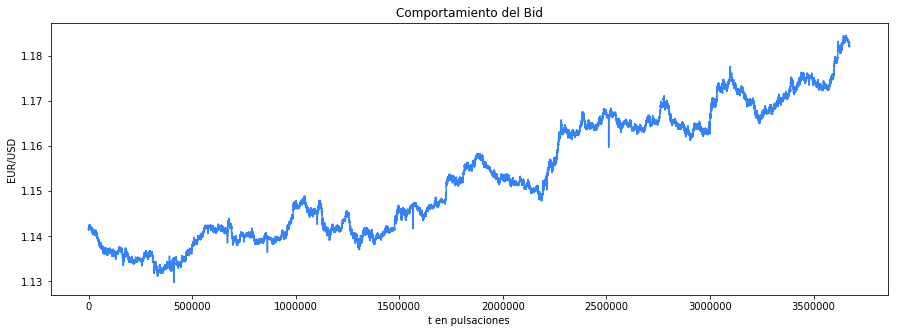

In [6]:
plt.figure(figsize=(15,5))
plt.title('Comportamiento del Bid')
plt.xlabel('t en pulsaciones')
plt.ylabel('EUR/USD')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,1], alpha =1, color='#3383FF');

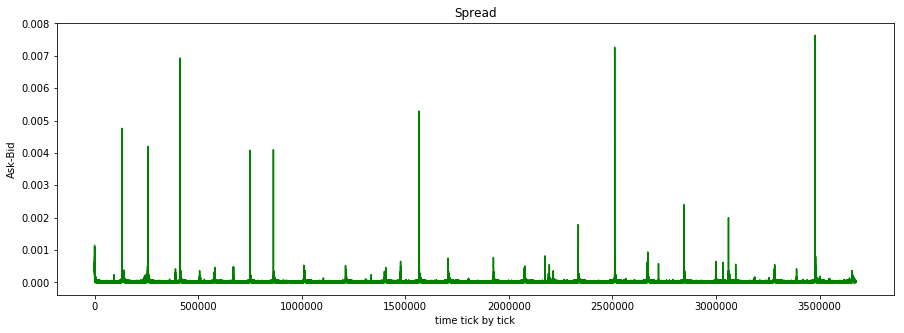

In [7]:
plt.figure(figsize=(15,5))
plt.title('Spread')
plt.xlabel('time tick by tick')
plt.ylabel('Ask-Bid')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,2]-datos.iloc[:,1],color='green');

In [8]:
datos = datos.set_index(pd.to_datetime(datos.iloc[:,0])) #Se indexan los datos por su fecha y hora
datos = datos.drop(['date'],axis = 1) #se elimina la columna date

In [9]:
print (datos.shape)
datos.head()

(3673884, 2)


,bid,ask
date,,
2017-07-02 21:02:01.905,1.14154,1.14268
2017-07-02 21:02:02.030,1.14154,1.14255
2017-07-02 21:02:02.092,1.14162,1.14220
2017-07-02 21:02:04.346,1.14157,1.14268
2017-07-02 21:02:04.408,1.14154,1.14248


In [10]:
#se agrupan los indices según su fecha
datos = datos.groupby(datos.index).agg('last')
#datos = datos.groupby(datos.index).agg('ohlc')
datos.shape

(2662044, 2)

In [10]:
#para correr los dias, quedan 5 bussines day
datos.index = datos.index + pd.Timedelta(hours=2, minutes=57, seconds=60)

In [11]:
datos.head()

,bid,ask
date,,
2017-07-03 00:00:01.905,1.14154,1.14268
2017-07-03 00:00:02.030,1.14154,1.14255
2017-07-03 00:00:02.092,1.14162,1.14220
2017-07-03 00:00:04.346,1.14157,1.14268
2017-07-03 00:00:04.408,1.14154,1.14248


In [12]:
#se muestrean en intervalos de 10s
datos = datos.resample('10s', loffset='10s').mean() #no coger la media
print(datos.shape)
datos.head()

(251628, 2)


,bid,ask
date,,
2017-07-03 00:00:10,1.141614,1.142242
2017-07-03 00:00:20,1.141625,1.142110
2017-07-03 00:00:30,1.141626,1.142067
2017-07-03 00:00:40,NaN,NaN
2017-07-03 00:00:50,1.141640,1.142070


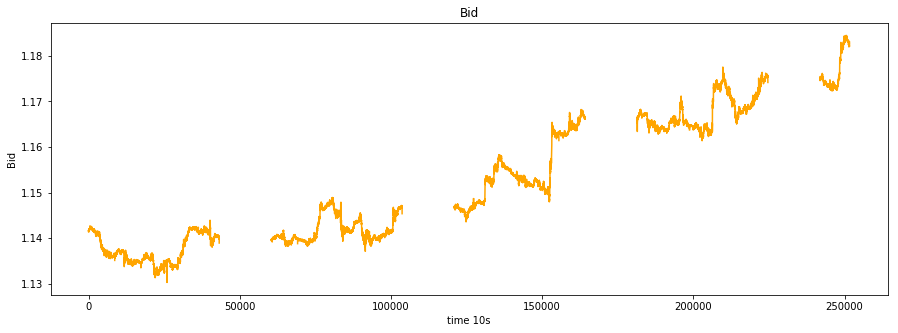

In [13]:
plt.figure(figsize=(15,5))
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('Bid')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,0],color='orange');

In [14]:
print('datos nan')
print(np.sum(pd.isnull(datos)*1))

datos nan
bid    72535
ask    72535
dtype: int64


In [15]:
datos = datos.dropna() #se eliminan los nan
print(datos.shape)

(179093, 2)


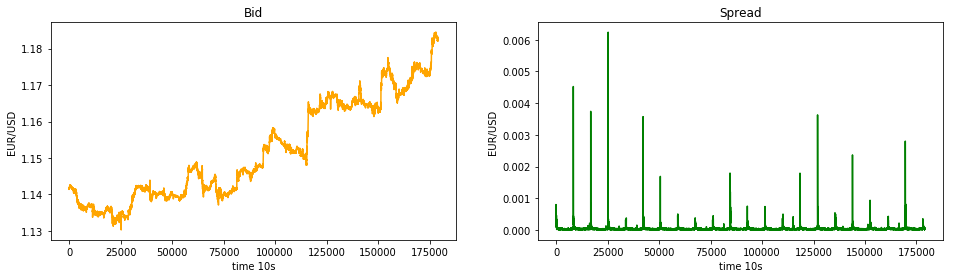

In [16]:
#utilizando los datos_mean
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('EUR/USD')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,0],color='orange');

plt.subplot(1,2,2)
plt.title('Spread')
plt.xlabel('time 10s')
plt.ylabel('EUR/USD')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,1]-datos.iloc[:,0],color='green');

In [17]:
datos.head()

,bid,ask
date,,
2017-07-03 00:00:10,1.141614,1.142242
2017-07-03 00:00:20,1.141625,1.142110
2017-07-03 00:00:30,1.141626,1.142067
2017-07-03 00:00:50,1.141640,1.142070
2017-07-03 00:01:00,1.141640,1.142080


In [18]:
datos.tail()

,bid,ask
date,,
2017-08-01 02:57:20,1.182321,1.182341
2017-08-01 02:57:30,1.182346,1.182366
2017-08-01 02:57:40,1.182287,1.182303
2017-08-01 02:57:50,1.182205,1.182230
2017-08-01 02:58:00,1.182104,1.182132


In [19]:
#eliminando los datos sobrantes del primer día del siguiente mes
datos = datos.drop(datos['2017-08'].index)
datos.shape

(178070, 2)

In [20]:
#guardar el data set pre-procesado
datos.to_csv('data/TrueFX/datos_procesados_EURUSD-2017-07.csv')

In [21]:
#para construir el nuevo dataset
def build_dataset(signal, window):
    result = []
    for index in range(len(signal) - window):
        result.append(signal[index: index + window])
    result = np.array(result)
    return result

ejemplo para saber cual es el ídice correspondiente en la señal inicial y el dataset

In [22]:
A = np.array([1,2,3,4,5,6,7,8,9,10])
w = 2
obj = 7
print('señal original =', A)
print('1bd', A[obj])
B = build_dataset(A,w)
print(B)
print('-------------')
print(B[obj-w+1,-1])


señal original = [ 1  2  3  4  5  6  7  8  9 10]
1bd 8
[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]
 [6 7]
 [7 8]
 [8 9]]
-------------
8


In [23]:
window = 10
signal = datos.iloc[:,0].as_matrix()
data_set = build_dataset(signal,window)
data_set.shape

(178060, 10)

In [24]:
obj = 8408
print(datos.iloc[:,0].as_matrix()[obj])
print(data_set[obj-window+1,-1])

1.136199
1.136199


In [25]:
datos.iloc[9,0] == data_set[0,-1]

True

In [26]:
#transformar los indices de los BD del data_set viejo al data_set transformado
def transform(l,w):
    for index in range(len(l)):
        for j in range(2):
            if l[index][j]==0:
                l[index][j]=0
            else:
                l[index][j] += -w+1 
    return l

In [27]:
#crea el intervalo de los Business day del data set viejo.
def build_bd(signal,lbd):
    r = []
    count = 0
    for index in lbd:
        f = len(signal[index])-1 +count
        r.append([count,f])
        count = f+1
    
    return r

In [1]:
lbd =list(['2017-07-03','2017-07-04','2017-07-05','2017-07-06','2017-07-07','2017-07-10','2017-07-11'
          ,'2017-07-12','2017-07-13','2017-07-14','2017-07-17','2017-07-18','2017-07-19','2017-07-20'
          ,'2017-07-21','2017-07-24','2017-07-25','2017-07-26','2017-07-27','2017-07-28'])

index_datos = build_bd(datos,lbd)
index_datos

NameError: name 'build_bd' is not defined

In [29]:
index_dt = transform(index_datos,window)
index_dt

[[0, 8399],
 [8400, 16848],
 [16849, 25320],
 [25321, 33787],
 [33788, 42256],
 [42257, 50635],
 [50636, 59049],
 [59050, 67558],
 [67559, 76019],
 [76020, 84463],
 [84464, 92873],
 [92874, 101440],
 [101441, 109918],
 [109919, 118432],
 [118433, 126961],
 [126962, 135421],
 [135422, 143919],
 [143920, 152457],
 [152458, 161040],
 [161041, 169553]]

In [30]:
len(index_dt)

20

In [31]:
def validation(estimator,data,index,bd=4):
    scores = []
    for i in range(len(index)-bd):
        x_train = data[index[i][0]:index[bd-1+i][1],:-1]
        y_train = data[index[i][0]:index[bd-1+i][1],-1]
        
        x_test = data[index[i+bd][0]:index[i+bd][1],:-1]
        y_test = data[index[i+bd][0]:index[i+bd][1],-1]
        
        reg = estimator.fit(x_train,y_train)
        scores.append(estimator.score(x_test,y_test))
        
    return scores

In [32]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
s = validation(clf,data_set,index_dt)
print ('score mean = ',np.mean(s))
print ('score std = ',np.std(s))

score mean =  0.605441813806
score std =  0.932901640294


In [33]:
s

[0.92890565521449442,
 0.80880297538636747,
 0.50707215903248959,
 0.94528506815651103,
 0.96826635940978811,
 0.99171256400706476,
 0.94493399454914007,
 -2.914488089175209,
 0.95913059949168966,
 0.70333372111028503,
 0.17681103003998919,
 0.95470532176582923,
 0.84778878920589662,
 0.93969802160695837,
 0.93241231366487509,
 0.99269853742647884]

In [34]:
index_dt[11]

[92874, 101440]

In [35]:
data_set[-1]

array([ 1.18417189,  1.18420442,  1.18409678,  1.18409973,  1.18410083,
        1.184115  ,  1.18416286,  1.18410367,  1.18407191,  1.1841    ])

In [36]:
#index_dt[7] datos con los que se probó
data_set[index_dt[11][0]:index_dt[11][1],-1]

array([ 1.14792694,  1.14793267,  1.14796   , ...,  1.15539167,
        1.1554    ,  1.15533875])

In [37]:
#index_dt[7]
index_dt[3:7]

[[25321, 33787], [33788, 42256], [42257, 50635], [50636, 59049]]

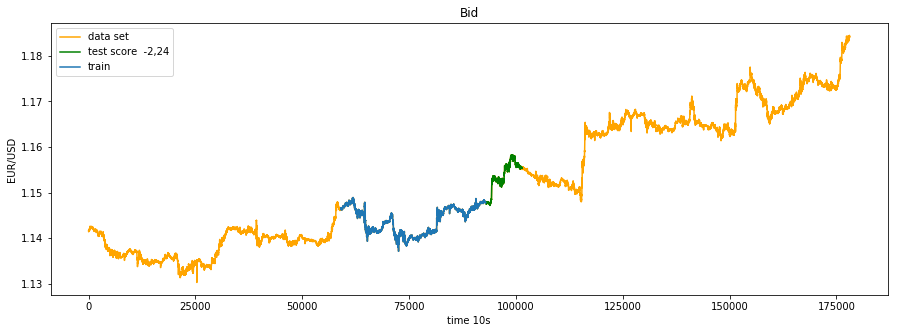

In [38]:
#
plt.figure(figsize=(15,5))
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('EUR/USD')
plt.plot(np.arange(data_set.shape[0]), data_set[:,-1],color='orange', label ='data set')

plt.plot(np.arange(index_dt[11][1]), list(np.zeros(index_dt[11][0])*np.nan)
         +list(data_set[index_dt[11][0]:index_dt[11][1],-1]),label ="test score  -2,24", color= 'green')

plt.plot(np.arange(index_dt[10][1]), list(np.zeros(index_dt[7][0])*np.nan)
         +list(data_set[index_dt[7][0]:index_dt[10][1],-1])
        ,label ="train")
plt.legend()

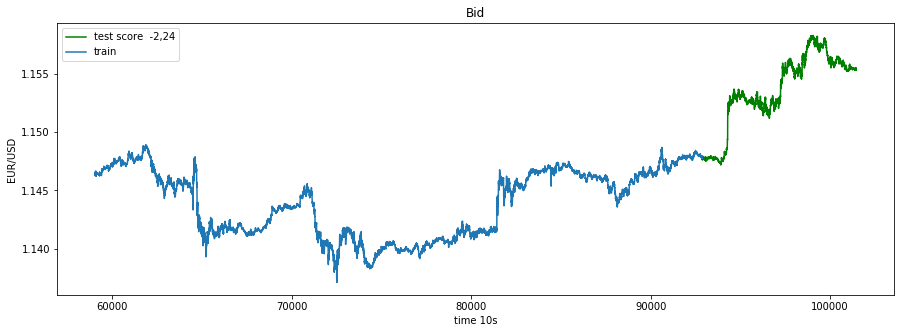

In [39]:
plt.figure(figsize=(15,5))
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('EUR/USD')
plt.plot(np.arange(index_dt[11][1]), list(np.zeros(index_dt[11][0])*np.nan)
         +list(data_set[index_dt[11][0]:index_dt[11][1],-1]),label ="test score  -2,24", color= 'green')

plt.plot(np.arange(index_dt[10][1]), list(np.zeros(index_dt[7][0])*np.nan)
         +list(data_set[index_dt[7][0]:index_dt[10][1],-1])
        ,label ="train")
plt.legend()

In [40]:
#verificando el entrenamiento del peor caso
from sklearn import tree
x_1 =7
y_1 =10
x_t =11

clf = tree.DecisionTreeRegressor()
clf.fit(data_set[index_dt[x_1][0]:index_dt[y_1][1],:-1],data_set[index_dt[x_1][0]:index_dt[y_1][1],-1])

print ('score = ',clf.score(data_set[index_dt[x_t][0]:index_dt[x_t][1],:-1]
                                 ,data_set[index_dt[x_t][0]:index_dt[x_t][1],-1]))

score =  -2.91448808918


In [41]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor()
s = validation(clf,data_set,index_dt)
print ('score mean = ',np.mean(s))
print ('score std = ',np.std(s))

score mean =  0.719503918425
score std =  0.779217695602


In [42]:
s

[0.99128522796368979,
 0.99525265092829585,
 0.78392325874137192,
 0.98898200314256057,
 0.99794015696462612,
 0.99924321952853934,
 0.99745243426577712,
 -2.2429928698800876,
 0.99701653519963562,
 0.75995351615119566,
 0.4148809785617667,
 0.99739958112814564,
 0.93187092967538143,
 0.93944481301840532,
 0.96130033753012045,
 0.99910992188030412]

In [43]:
#pintando con bokeh
plot = bp.figure(width=900, height=400, title ="EUR vs USD",x_axis_label = "days", y_axis_label= "EUR/USD")
plot.line(np.arange(datos.shape[0]),datos[:,2], legend= "Bid")
bp.show(plot)

TypeError: unhashable type: 'slice'